In [ ]:
#Library for data manipulation and analysis
import pandas as pd

In [ ]:
import os

In [ ]:
import numpy as np
from numpy.random import seed
from numpy.random import randn



from sklearn import linear_model
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.graphics.gofplots import qqplot
import statsmodels.api as sm

import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('seaborn-whitegrid')

import seaborn as sns
sns.set(style="whitegrid")

import math
%config IPCompleter.greedy=True

import csv
import time

import scipy.stats as stats

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [ ]:
import warnings
warnings.filterwarnings('always')
warnings.filterwarnings('ignore')

In [ ]:
##1.	Read the ‘csv’ file provided 

In [ ]:
dataset = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/archive/train_data.csv", names=['date','product_identifier','department_identifier','category_of_product','outlet','state','sales'],sep=',', header=0)
prod_price = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/archive/product_prices.csv",sep=',', header=0,names=['outlet','product_identifier','week_id','sell_price'])
date_week=pd.read_csv("/content/drive/MyDrive/Colab Notebooks/archive/date_to_week_id_map.csv",sep=',',header=0, names=['date','week_id'])

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
##a.	Get the dimensions of the data

In [ ]:
dataset.shape, prod_price.shape, date_week.shape

((395000, 7), (59000, 4), (821, 2))

In [ ]:
##merge csv files

In [ ]:
df=pd.merge(prod_price,date_week, on=['week_id'], how='inner')
dataset=pd.merge(dataset,df, on=['date','product_identifier','outlet'], how='inner')
dataset

,date,product_identifier,department_identifier,category_of_product,outlet,state,sales,week_id,sell_price
0,2012-01-01,74,11,others,111,Maharashtra,0,49,2.94
1,2012-01-01,337,11,others,111,Maharashtra,1,49,7.44
2,2012-01-01,423,12,others,111,Maharashtra,0,49,0.97
3,2012-01-01,432,12,others,111,Maharashtra,0,49,4.97
4,2012-01-01,581,21,fast_moving_consumer_goods,111,Maharashtra,0,49,4.88
...,...,...,...,...,...,...,...,...,...
394995,2014-02-28,2932,33,drinks_and_food,333,Kerala,2,161,2.78
394996,2014-02-28,2935,33,drinks_and_food,333,Kerala,8,161,0.20
394997,2014-02-28,3004,33,drinks_and_food,333,Kerala,0,161,2.50
394998,2014-02-28,3008,33,drinks_and_food,333,Kerala,0,161,1.98


In [ ]:
##b.	Get the summary

In [ ]:
dataset.describe()

,product_identifier,department_identifier,outlet,sales,week_id,sell_price
count,395000.000000,395000.000000,395000.000000,395000.000000,395000.000000,395000.000000
mean,1509.960000,24.460000,211.200000,1.228919,105.070886,4.987644
std,809.799518,6.337863,91.161291,3.595266,32.578749,3.874444
min,74.000000,11.000000,111.000000,0.000000,49.000000,0.050000
25%,926.000000,21.000000,113.000000,0.000000,77.000000,2.680000
50%,1325.000000,22.000000,221.500000,0.000000,105.000000,3.980000
75%,1753.000000,31.000000,331.000000,1.000000,133.000000,6.480000
max,3021.000000,33.000000,333.000000,293.000000,161.000000,44.360000


In [ ]:
##c.	Print the first 5 rows and last 5 rows.

In [ ]:
dataset.head(5)

,date,product_identifier,department_identifier,category_of_product,outlet,state,sales,week_id,sell_price
0,2012-01-01,74,11,others,111,Maharashtra,0,49,2.94
1,2012-01-01,337,11,others,111,Maharashtra,1,49,7.44
2,2012-01-01,423,12,others,111,Maharashtra,0,49,0.97
3,2012-01-01,432,12,others,111,Maharashtra,0,49,4.97
4,2012-01-01,581,21,fast_moving_consumer_goods,111,Maharashtra,0,49,4.88


In [ ]:
##c.	Print the first 5 rows and last 5 rows.
dataset.tail(5)

,date,product_identifier,department_identifier,category_of_product,outlet,state,sales,week_id,sell_price
394995,2014-02-28,2932,33,drinks_and_food,333,Kerala,2,161,2.78
394996,2014-02-28,2935,33,drinks_and_food,333,Kerala,8,161,0.20
394997,2014-02-28,3004,33,drinks_and_food,333,Kerala,0,161,2.50
394998,2014-02-28,3008,33,drinks_and_food,333,Kerala,0,161,1.98
394999,2014-02-28,3021,33,drinks_and_food,333,Kerala,0,161,2.08


In [ ]:
##5.	Verify if there are any null values in each of the columns. (don’t impute now).

In [ ]:
dataset.isnull().sum()

date                     0
product_identifier       0
department_identifier    0
category_of_product      0
outlet                   0
state                    0
sales                    0
week_id                  0
sell_price               0
dtype: int64

In [ ]:
##d.	Explore the data types of each column.
dataset.dtypes

date                      object
product_identifier         int64
department_identifier      int64
category_of_product       object
outlet                     int64
state                     object
sales                      int64
week_id                    int64
sell_price               float64
dtype: object

In [ ]:
##converting as category
col = ['category_of_product', 'state']
dataset[col] = dataset[col].astype('category')

In [ ]:
##e.	Understand if all the columns are in appropriate datatypes or not.
dataset.dtypes

date                       object
product_identifier          int64
department_identifier       int64
category_of_product      category
outlet                      int64
state                    category
sales                       int64
week_id                     int64
sell_price                float64
dtype: object

In [ ]:
##check for insights using scatterplot
def scatter(dataset, column):
    plt.figure()
    plt.scatter(dataset[column] , dataset['sales'])
    plt.ylabel('sales')
    plt.xlabel(column)

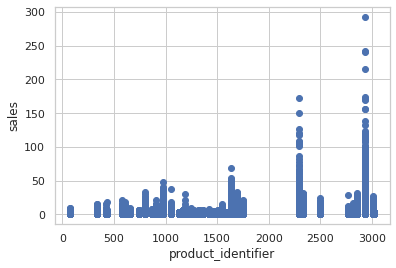

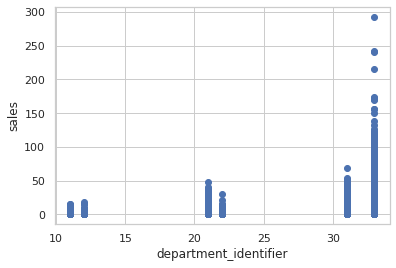

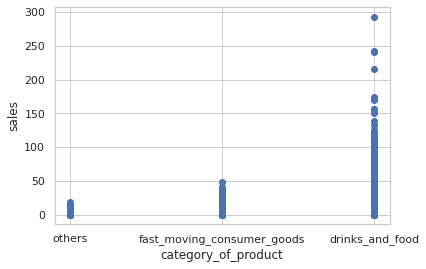

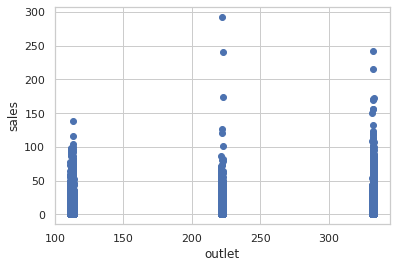

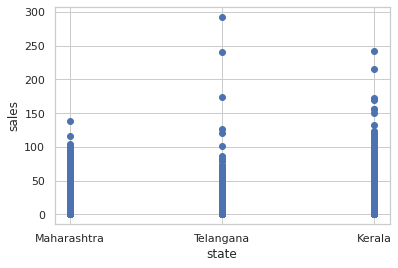

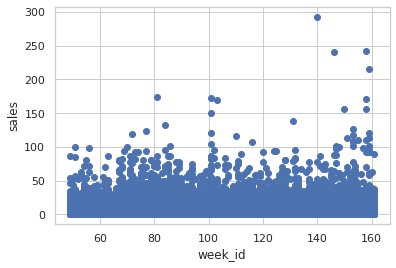

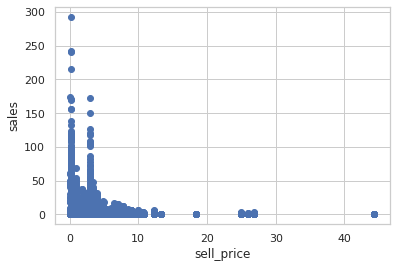

In [ ]:
scatter(dataset, 'product_identifier')
scatter(dataset, 'department_identifier')
scatter(dataset, 'category_of_product')
scatter(dataset, 'outlet')
scatter(dataset, 'state')
scatter(dataset, 'week_id')
scatter(dataset, 'sell_price')

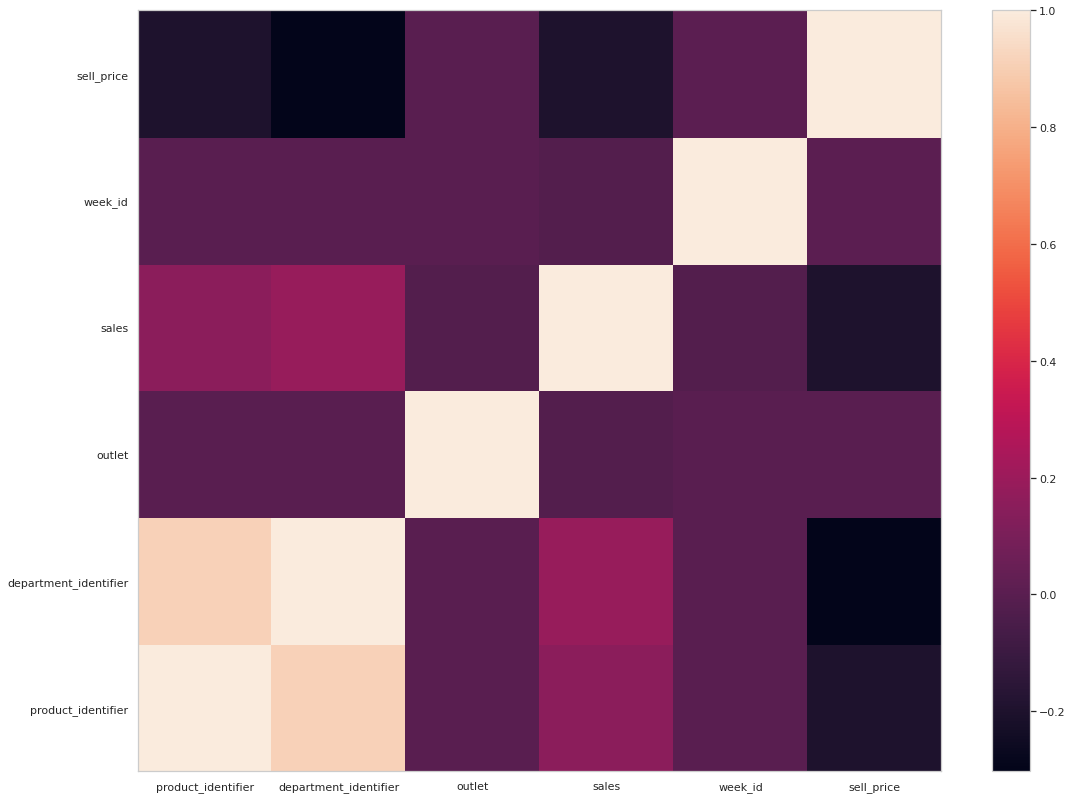

In [ ]:
fig = plt.figure(figsize=(18, 14))
corr = dataset.corr()
c = plt.pcolor(corr)
plt.yticks(np.arange(0.5, len(corr.index), 1), corr.index)
plt.xticks(np.arange(0.5, len(corr.columns), 1), corr.columns)
fig.colorbar(c)

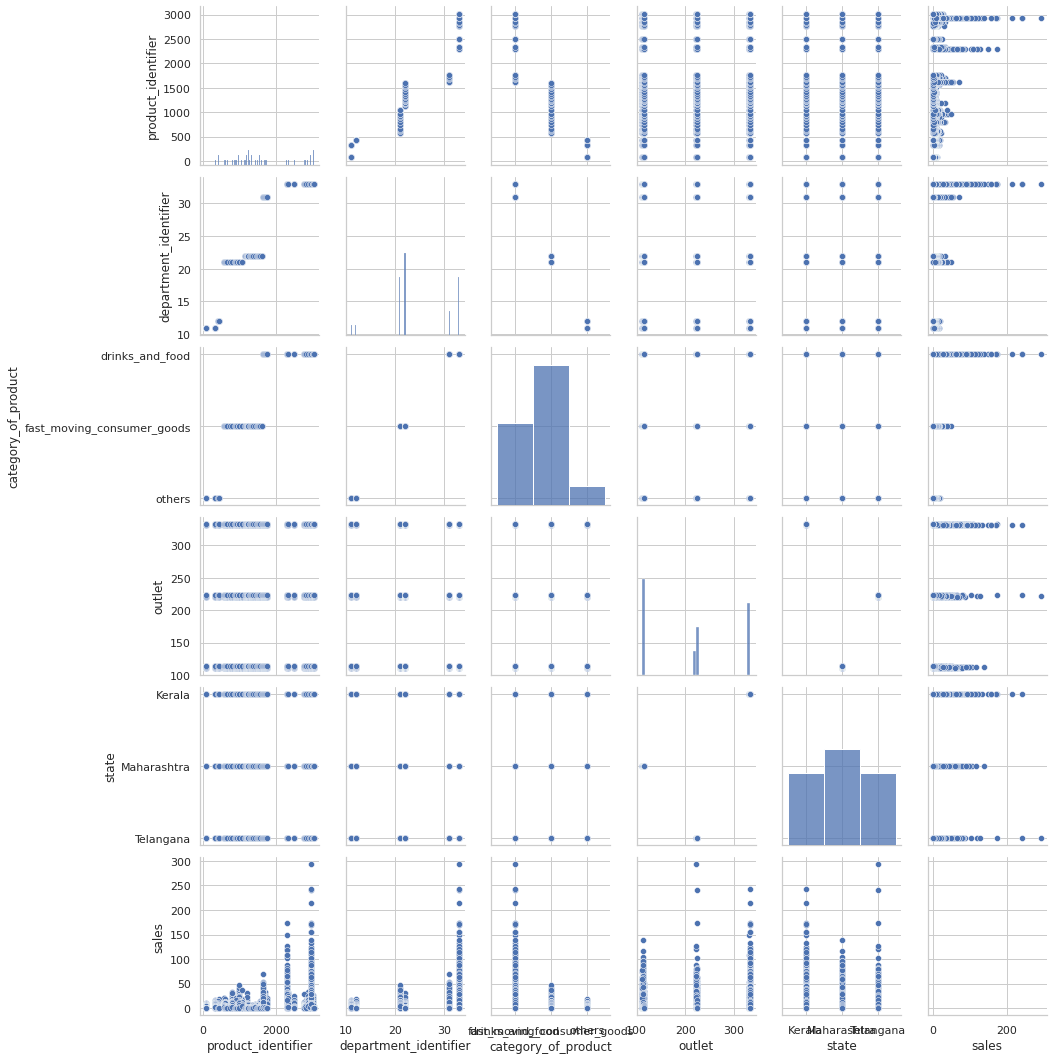

In [ ]:
#vars() function in Python,vars() method takes only one parameter and that too is optional,
#It takes an object as a parameter which may be can a module, a class, an instance, or any object having __dict__ attribute.
sns.pairplot(dataset, vars=['product_identifier','department_identifier','category_of_product','outlet','state','sales'])

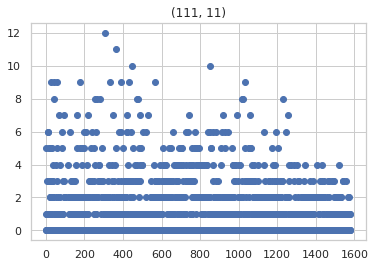

In [ ]:
for name, group in dataset.groupby(["outlet", "department_identifier"]):
    plt.title(name)
    plt.scatter(range(len(group)), group["sales"])
    plt.show()
    break

In [ ]:
##use label encoder-LabelEncoder encode labels with a value between 0 and n_classes-1 where n is the number of distinct labels
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelEncoder
dataset['state_encoded'] = LabelEncoder().fit_transform(dataset['state'])
dataset[['state', 'state_encoded']]

,state,state_encoded
0,Maharashtra,1
1,Maharashtra,1
2,Maharashtra,1
3,Maharashtra,1
4,Maharashtra,1
...,...,...
394995,Kerala,0
394996,Kerala,0
394997,Kerala,0
394998,Kerala,0


In [ ]:
#### Maharastra=1; Kerala = 0; Telangana=2

In [ ]:
dataset['cat_prod_encoded'] = LabelEncoder().fit_transform(dataset['category_of_product'])
dataset[['category_of_product', 'cat_prod_encoded']]

,category_of_product,cat_prod_encoded
0,others,2
1,others,2
2,others,2
3,others,2
4,fast_moving_consumer_goods,1
...,...,...
394995,drinks_and_food,0
394996,drinks_and_food,0
394997,drinks_and_food,0
394998,drinks_and_food,0


In [ ]:
#### drinks_and_food=0; fast_moving_consumer_goods=1; others=2

In [ ]:
dataset['Month'] = pd.to_datetime(dataset['date']).dt.month
dataset = dataset.drop(columns=["date","week_id","state","category_of_product"])
dataset

,product_identifier,department_identifier,outlet,sales,sell_price,state_encoded,cat_prod_encoded,Month
0,74,11,111,0,2.94,1,2,1
1,337,11,111,1,7.44,1,2,1
2,423,12,111,0,0.97,1,2,1
3,432,12,111,0,4.97,1,2,1
4,581,21,111,0,4.88,1,1,1
...,...,...,...,...,...,...,...,...
394995,2932,33,333,2,2.78,0,0,2
394996,2935,33,333,8,0.20,0,0,2
394997,3004,33,333,0,2.50,0,0,2
394998,3008,33,333,0,1.98,0,0,2


In [ ]:
##using different machine learning algorithm

In [ ]:
def knn():
    knn = KNeighborsRegressor(n_neighbors=10)
    return knn

def extraTreesRegressor():
    clf = ExtraTreesRegressor(n_estimators=100,max_features='auto', verbose=1, n_jobs=1)
    return clf

def randomForestRegressor():
    clf = RandomForestRegressor(n_estimators=100,max_features='log2', verbose=1)
    return clf

def svm():
    clf = SVR(kernel='rbf', gamma='auto')
    return clf

def predict_(m, test_x):
    return pd.Series(m.predict(test_x))

def model_():
#     return knn()
    return extraTreesRegressor()
#     return svm()
#     return nn()
#     return randomForestRegressor()    

def train_(train_x, train_y):
    m = model_()
    m.fit(train_x, train_y)
    return m

def train_and_predict(train_x, train_y, test_x):
    m = train_(train_x, train_y)
    return predict_(m, test_x), m


In [ ]:
def calculate_error(test_y, predicted, weights):
    return mean_absolute_error(test_y, predicted, sample_weight=weights)

In [ ]:
from sklearn.model_selection import KFold

In [ ]:
##K-Folds cross-validator
#Provides train/test indices to split data in train/test sets. Split dataset into k consecutive folds (without shuffling by default).
kf = KFold(n_splits=5)
splited = []
# dataset2 = dataset.copy()
for name, group in dataset.groupby(["outlet", "department_identifier"]):
    group = group.reset_index(drop=True)
    trains_x = []
    trains_y = []
    tests_x = []
    tests_y = []
    if group.shape[0] <= 5:
        f = np.array(range(5))
        np.random.shuffle(f)
        group['fold'] = f[:group.shape[0]]
        continue
    fold = 0
    for train_index, test_index in kf.split(group):
        group.loc[test_index, 'fold'] = fold
        fold += 1
    splited.append(group)

splited = pd.concat(splited).reset_index(drop=True)

In [ ]:
splited

,product_identifier,department_identifier,outlet,sales,sell_price,state_encoded,cat_prod_encoded,Month,fold
0,74,11,111,0,2.94,1,2,1,0.0
1,337,11,111,1,7.44,1,2,1,0.0
2,74,11,111,0,2.94,1,2,1,0.0
3,337,11,111,5,7.44,1,2,1,0.0
4,74,11,111,1,2.94,1,2,1,0.0
...,...,...,...,...,...,...,...,...,...
394995,2932,33,333,2,2.78,0,0,2,4.0
394996,2935,33,333,8,0.20,0,0,2,4.0
394997,3004,33,333,0,2.50,0,0,2,4.0
394998,3008,33,333,0,1.98,0,0,2,4.0


In [ ]:
from sklearn.ensemble import ExtraTreesRegressor, RandomForestRegressor

In [ ]:
from sklearn.metrics import mean_absolute_error

In [ ]:
best_model = None
error_cv = 0
best_error = np.iinfo(np.int32).max
for fold in range(5):
    dataset_train = splited.loc[splited['fold'] != fold]
    dataset_test = splited.loc[splited['fold'] == fold]
    train_y = dataset_train['sales']
    train_x = dataset_train.drop(columns=['sales', 'fold'])
    test_y = dataset_test['sales']
    test_x = dataset_test.drop(columns=['sales', 'fold'])
    print(dataset_train.shape, dataset_test.shape)
    predicted, model = train_and_predict(train_x, train_y, test_x)
    weights = test_x['outlet'].replace(True, 5).replace(False, 1)
    error = calculate_error(test_y, predicted, weights)
    error_cv += error
    print(fold, error)
    if error < best_error:
        print('Find best model')
        best_error = error
        best_model = model
error_cv /= 5

(316000, 9) (79000, 9)


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:   19.8s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.5s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


0 1.2387110128948498
Find best model
(316000, 9) (79000, 9)


[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:   21.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.5s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


1 1.1442954243400743
Find best model
(316000, 9) (79000, 9)


[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:   20.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.5s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


2 1.180879889459888
(316000, 9) (79000, 9)


[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:   20.9s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.5s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


3 1.1098180587476256
Find best model
(316000, 9) (79000, 9)


[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:   20.3s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


4 1.1869525643415655


[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.5s finished


In [ ]:
if error < best_error:
        print('Find best model')
        best_error = error
        best_model = model

In [ ]:
print(best_error)

1.1098180587476256


In [ ]:
##Decision tree
print(best_model)

ExtraTreesRegressor(bootstrap=False, ccp_alpha=0.0, criterion='mse',
                    max_depth=None, max_features='auto', max_leaf_nodes=None,
                    max_samples=None, min_impurity_decrease=0.0,
                    min_impurity_split=None, min_samples_leaf=1,
                    min_samples_split=2, min_weight_fraction_leaf=0.0,
                    n_estimators=100, n_jobs=1, oob_score=False,
                    random_state=None, verbose=1, warm_start=False)


In [ ]:
##Using test data

In [ ]:
dataset_test = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/archive/test_data.csv", names=['id','date','product_identifier','department_identifier','category_of_product','outlet','state'],sep=',', header=0)
prod_price = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/archive/product_prices.csv",sep=',', header=0,names=['outlet','product_identifier','week_id','sell_price'])
date_week=pd.read_csv("/content/drive/MyDrive/Colab Notebooks/archive/date_to_week_id_map.csv",sep=',',header=0, names=['date','week_id'])

In [ ]:
df=pd.merge(prod_price,date_week, on=['week_id'], how='inner')
dataset_test=pd.merge(dataset_test,df, on=['date','product_identifier','outlet'], how='inner')
dataset_test

,id,date,product_identifier,department_identifier,category_of_product,outlet,state,week_id,sell_price
0,1,2014-03-01,74,11,others,111,Maharashtra,162,3.43
1,2,2014-03-01,337,11,others,111,Maharashtra,162,7.78
2,3,2014-03-01,423,12,others,111,Maharashtra,162,0.97
3,4,2014-03-01,432,12,others,111,Maharashtra,162,4.97
4,5,2014-03-01,581,21,fast_moving_consumer_goods,111,Maharashtra,162,4.88
...,...,...,...,...,...,...,...,...,...
15495,15496,2014-03-31,2932,33,drinks_and_food,333,Kerala,166,2.78
15496,15497,2014-03-31,2935,33,drinks_and_food,333,Kerala,166,0.20
15497,15498,2014-03-31,3004,33,drinks_and_food,333,Kerala,166,2.68
15498,15499,2014-03-31,3008,33,drinks_and_food,333,Kerala,166,1.98


In [ ]:
##checking datatypes for test data
dataset_test.dtypes

id                        int64
date                     object
product_identifier        int64
department_identifier     int64
category_of_product      object
outlet                    int64
state                    object
dtype: object

In [ ]:
col = ['category_of_product', 'state']
dataset_test[col] = dataset_test[col].astype('category')

In [ ]:
dataset_test.dtypes

id                          int64
date                       object
product_identifier          int64
department_identifier       int64
category_of_product      category
outlet                      int64
state                    category
dtype: object

In [ ]:
##label encoder to convert categorical data, or text data, into numbers, which our predictive models can better understand.
dataset_test['state_encoded'] = LabelEncoder().fit_transform(dataset_test['state'])
dataset_test[['state', 'state_encoded']]

,state,state_encoded
0,Maharashtra,1
1,Maharashtra,1
2,Maharashtra,1
3,Maharashtra,1
4,Maharashtra,1
...,...,...
15495,Kerala,0
15496,Kerala,0
15497,Kerala,0
15498,Kerala,0


In [ ]:
#### Maharastra=1; Kerala = 0; Telangana=2

In [ ]:
dataset_test['cat_prod_encoded'] = LabelEncoder().fit_transform(dataset_test['category_of_product'])
dataset_test[['category_of_product', 'cat_prod_encoded']]

,category_of_product,cat_prod_encoded
0,others,2
1,others,2
2,others,2
3,others,2
4,fast_moving_consumer_goods,1
...,...,...
15495,drinks_and_food,0
15496,drinks_and_food,0
15497,drinks_and_food,0
15498,drinks_and_food,0


In [ ]:
##index=false--avoid pandas creating an index in saved csv file
dataset_test.to_csv('final_output.csv', index=False)